## 1. Exploring Loan Data

1. Explore the credit data

Begin by looking at the data set cr_loan. In this data set, loan_status shows whether the loan is currently in default with 1 being default and 0 being non-default.

You have more columns within the data, and many could have a relationship with the values in loan_status. You need to explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

In [22]:
# Import pandas as pd
import pandas as pd
import matplotlib as mtlb
import matplotlib.pyplot as plt
import numpy as np

# Read in the csv file
loan_data = pd.read_csv('cr_loan.csv')

In [2]:
# Check the structure of the data
print(loan_data.dtypes)

# Check the first five rows of the data
print(loan_data.head(5))

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D

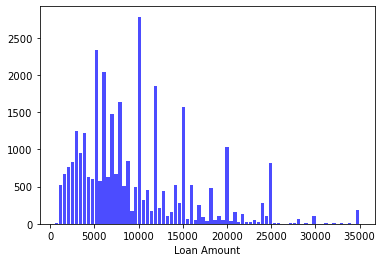

In [3]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=loan_data['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

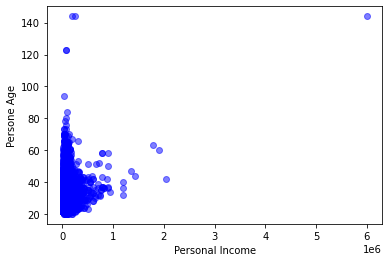

In [6]:
# Plot a scatter plot of income against age
#
plt.scatter(loan_data['person_income'], loan_data['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

2.Crosstab and pivot tables

Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, you get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

You will be able to see how the values are populated throughout the data, and visualize them. For now, you need to check how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.

In [7]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(loan_data['loan_intent'], loan_data['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [8]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(loan_data['person_home_ownership'],[loan_data['loan_status'],loan_data['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [9]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(loan_data['person_home_ownership'], loan_data['loan_status'],
              values=loan_data['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


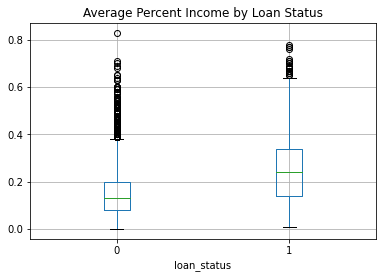

In [10]:
# Create a box plot of percentage income by loan status
loan_data.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

3.Finding outliers with cross tables

Now you need to find and remove outliers you suspect might be in the data. For this exercise, you can use cross tables and aggregate functions.

Have a look at the person_emp_length column. You've used the aggfunc = 'mean' argument to see the average of a numeric column before, but to detect outliers you can use other functions like min and max.

It may not be possible for a person to have an employment length of less than 0 or greater than 60. You can use cross tables to check the data and see if there are any instances of this!

In [14]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(loan_data['loan_status'],loan_data['person_home_ownership'],
        values=loan_data['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [17]:
# Create an array of indices where employment length is greater than 60
indices = loan_data[loan_data['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
loan_data_new = loan_data.drop(indices)

# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(loan_data_new['loan_status'],loan_data_new['person_home_ownership'],
            values=loan_data_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


4.Visualizing credit outliers

You discovered outliers in person_emp_length where values greater than 60 were far above the norm. person_age is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over 100 years old.

Visualizing the data here can be another easy way to detect outliers. You can use other numeric columns like loan_amnt and loan_int_rate to create plots with person_age to search for outliers.

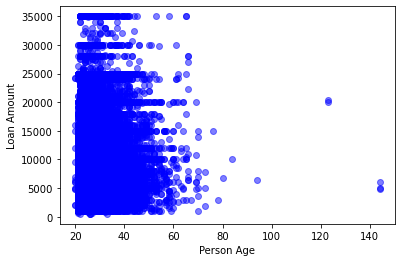

In [19]:
# Create the scatter plot for age and amount
plt.scatter(loan_data['person_age'], loan_data['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

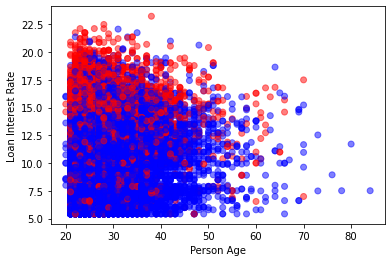

In [26]:
# Use Pandas to drop the record from the data frame and create a new one
loan_data_new = loan_data_new.drop(loan_data_new[loan_data_new['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(loan_data_new['person_age'], loan_data_new['loan_int_rate'],
            c = loan_data_new['loan_status'],
            cmap = mtlb.colors.ListedColormap(colors),
            alpha=0.5)
#plt.legend()
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

5.Replacing missing credit data

Now, you should check for missing data. If you find missing data within loan_status, you would not be able to use the data for predicting probability of default because you wouldn't know if the loan was a default or not. Missing data within person_emp_length would not be as damaging, but would still cause training errors.

So, check for missing data in the person_emp_length column and replace any missing values with the median.

In [28]:
# Print a null value column array
print(loan_data_new.columns[loan_data_new.isnull().any()])

# Print the top five rows with nulls for employment length
print(loan_data_new[loan_data_new['person_emp_length'].isnull()].head(5))


Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

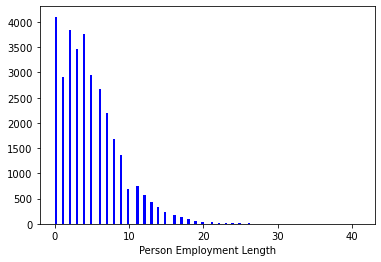

In [48]:

# Impute the null values with the median value for all employment lengths
loan_data_new['person_emp_length'].fillna((loan_data_new['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(loan_data_new['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

6. Removing missing data

You replaced missing data in person_emp_length, but in the previous exercise you saw that loan_int_rate has missing data as well.

Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult.

Because interest rates are set by your company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but you cannot know for sure. For now, it's best to .drop() these records before moving forward.

In [61]:
# Print the number of nulls
print(loan_data_new['loan_int_rate'].isnull().sum())

3115


In [62]:
# Store the array on indices
indices = loan_data_new[loan_data_new['loan_int_rate'].isnull()].index

# Save the new data without missing data
loan_data_new_clean = loan_data_new.drop(indices)

In [63]:
loan_data_new_clean.to_csv(r'clean_loan_data.csv', index = False)